<a href="https://colab.research.google.com/github/amohd63/ENCS5341-ML/blob/main/ENCS5341_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h5><center></center></h5>
<h1><center>Machine Learning and Data Science ‐ ENCS5341</center></h1>

<h1><center>Assignment #2</center></h1>

---
---

<h3>Ali Mohammed

1190502</h3>

In [ ]:
!rm -rf ./Datasets
!git clone https://github.com/amohd63/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 1), reused 23 (delta 1), pack-reused 0
Receiving objects: 100% (26/26), 936.60 KiB | 11.56 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# **Model Selection and Hyper-parameters Tunning**

The data_reg.csv file contains a set of 200 examples. Each row represents one example which has two attributes x1 and x2, and a continuous target label y. Using python, implement the solution of the following tasks:

1. Read the data from the csv file and split it into training set (the first 120 examples), validation set (the next 40 examples), and testing set (the last 40 examples). Plot the examples from the three sets in a scatter plot (each set encoded with a different color). Note that the plot here will be 3D plot where the x and y axes represent the x1 and x2 features, whereas the z-axis is the target label y.

2. Apply polynomial regression on the training set with degrees in the range of 1 to 10. Which polynomial degree is the best? Justify your answer by plotting the validation error vs polynomial degree curve. For each model plot the surface of the learned function alongside with the training examples on the same plot. (hint: you can use PolynomialFeatures and LinearRegression from
scikit-learn library)

3. Apply ridge regression on the training set to fit a polynomial of degree 8. For the regularization parameter, choose the best value among the following options: {0.001, 0.005, 0.01, 0.1, 10}. Plot the MSE on the validation vs the regularization parameter. (hint: you can use Ridge regression implementation from scikit-learn)


## Read the data from the csv file and split it into training, validation, testing sets and plot them in scatter plot.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg
from sklearn.pipeline import make_pipeline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import Ridge

Read the data from the csv file and split it into training set (the first 120 examples), validation set (the next 40 examples), and testing set (the last 40 examples).

Read the dataset.

In [ ]:
dataset = pd.read_csv("/content/Datasets/ML-Assignment2/data_reg.csv", sep=",")

Split the dataset into training, validation, testing.

In [ ]:
training_set = dataset[:120]
validation_set = dataset[120:160]
testing_set = dataset[160:]

Display the number of features & examples in the sets.

In [ ]:
print("Training set shape: {}".format(training_set.shape))
print("Validation set shape: {}".format(validation_set.shape))
print("Testing set shape: {}".format(testing_set.shape))

Training set shape: (120, 3)
Validation set shape: (40, 3)
Testing set shape: (40, 3)


From the displayed text above, it is clear that the dataset is splitted as required.

---

Now, split each set to X & y, input and target class.

In [ ]:
X_train, y_train = training_set.drop(columns='y'), training_set.y
X_val, y_val = validation_set.drop(columns='y'), validation_set.y
X_test, y_test = testing_set.drop(columns='y'), testing_set.y

---

Plot the examples from the three sets in a scatter plot

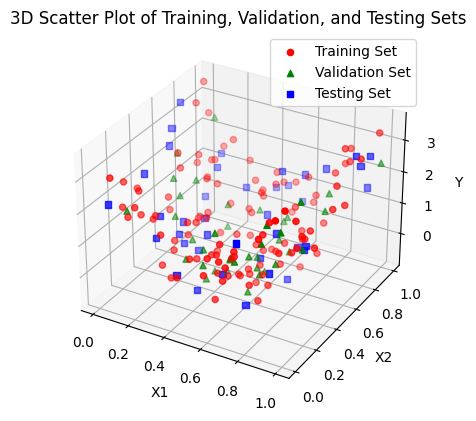

In [ ]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training set
ax.scatter(X_train['x1'], X_train['x2'], y_train, c='r', marker='o', label='Training Set')

# Scatter plot for validation set
ax.scatter(X_val['x1'], X_val['x2'], y_val, c='g', marker='^', label='Validation Set')

# Scatter plot for testing set
ax.scatter(X_test['x1'], X_test['x2'], y_test, c='b', marker='s', label='Testing Set')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('3D Scatter Plot of Training, Validation, and Testing Sets')

# Add legend
ax.legend()

# Show plot
plt.show()

Each data points is represented by three coordinates (X1, X2, y). The plot above shows the distribution of the examples on each set.

## Apply polynomial regression

First, read the data again.

In [ ]:
dataset = pd.read_csv("/content/Datasets/ML-Assignment2/data_reg.csv", sep=",")

X = dataset.drop(columns='y')
y = dataset['y']

X_train, X_val, X_test = X[:120], X[120:160], X[160:]
y_train, y_val, y_test = y[:120], y[120:160], y[160:]

For each model plot the surface of the learned function alongside with the training examples on the same plot.

The next two snippets shows the plots of the learned functions for the degrees in range [1, 10].

In [ ]:
mesh_size = .02
margin = 0

x_min, x_max = X_train.x1.min() - margin, X_train.x1.max() + margin
y_min, y_max = X_train.x2.min() - margin, X_train.x2.max() + margin

xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)

X, Y = np.meshgrid(xrange, yrange)

In [ ]:
def draw_suerface(s_deg, e_deg):
  fig, axes = plt.subplots(figsize=(48, 24), nrows=1, ncols=(e_deg-s_deg), subplot_kw=dict(projection="3d"))
  index = 0
  for degree in range(s_deg, e_deg):
    polynomial_features = PolynomialFeatures(degree=degree)
    linearreg = LinearRegression()
    pipeline = make_pipeline(polynomial_features, linearreg)
    pipeline.fit(X_train, y_train)

    # Run model
    pred = pipeline.predict(np.c_[X.ravel(), Y.ravel()])
    pred = pred.reshape(X.shape)

    # plot points and fitted surface
    axes[index].plot_surface(X, Y, pred, rstride=1, cstride=1, alpha=0.2, linewidth=0.5,  edgecolor='b')
    axes[index].scatter(X_train['x1'], X_train['x2'], y_train, c='r', s=20)
    axes[index].set_xlabel('X1')
    axes[index].set_ylabel('X2')
    axes[index].set_zlabel('Y')
    axes[index].set_title('Degree: ' + str(degree), fontsize=48)
    index = index + 1

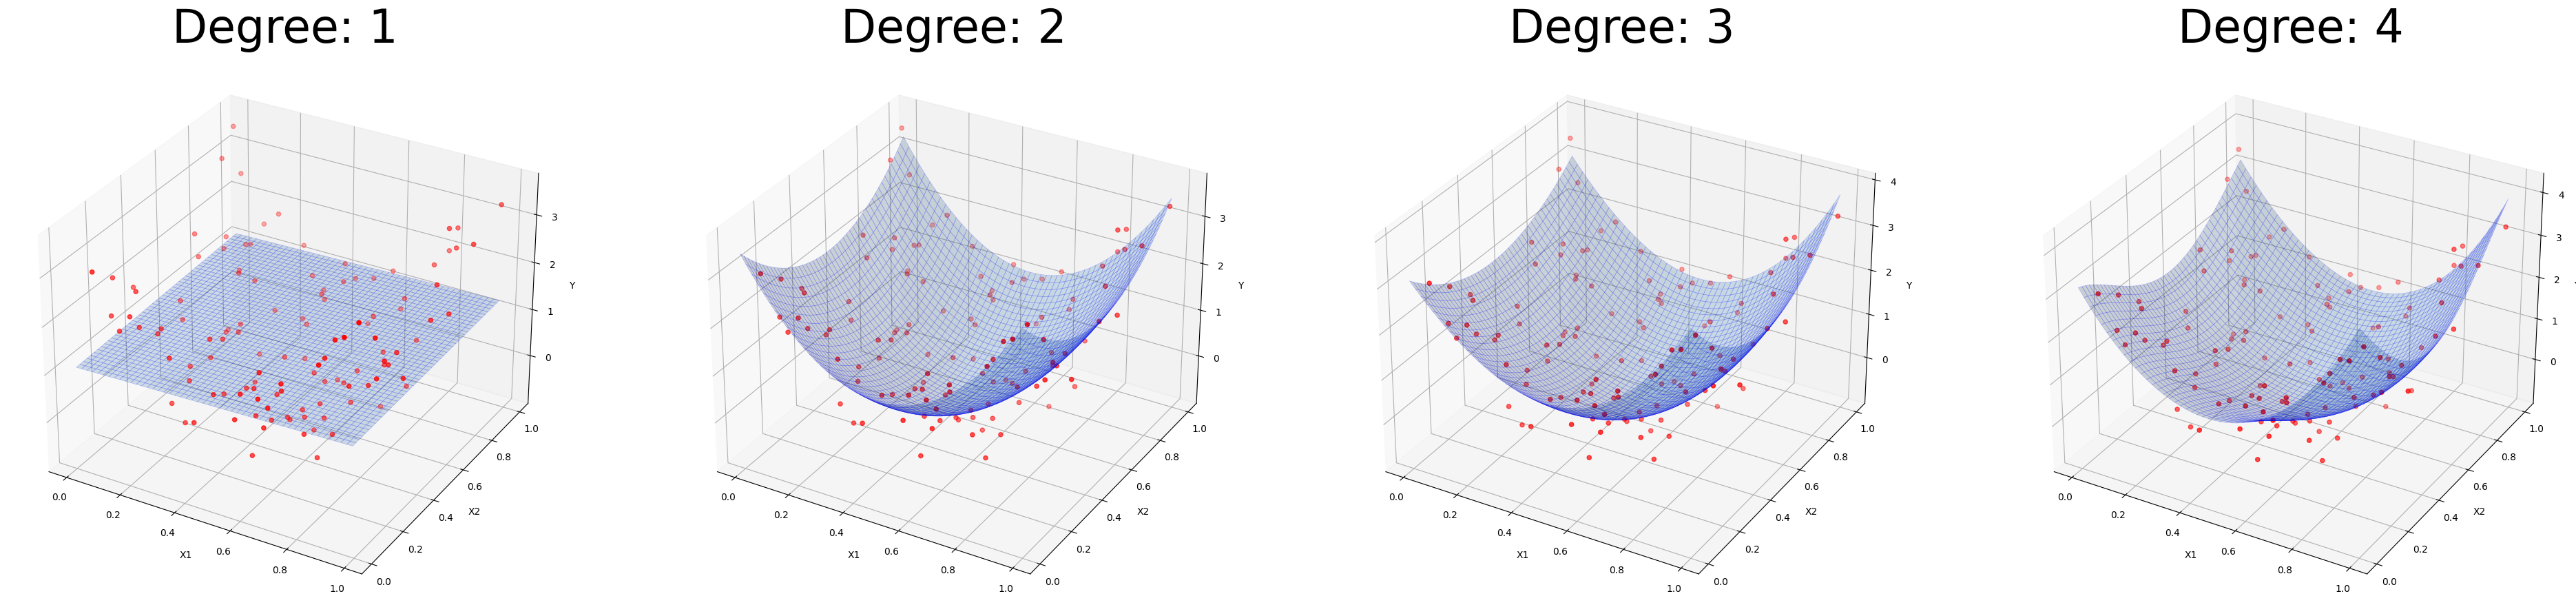

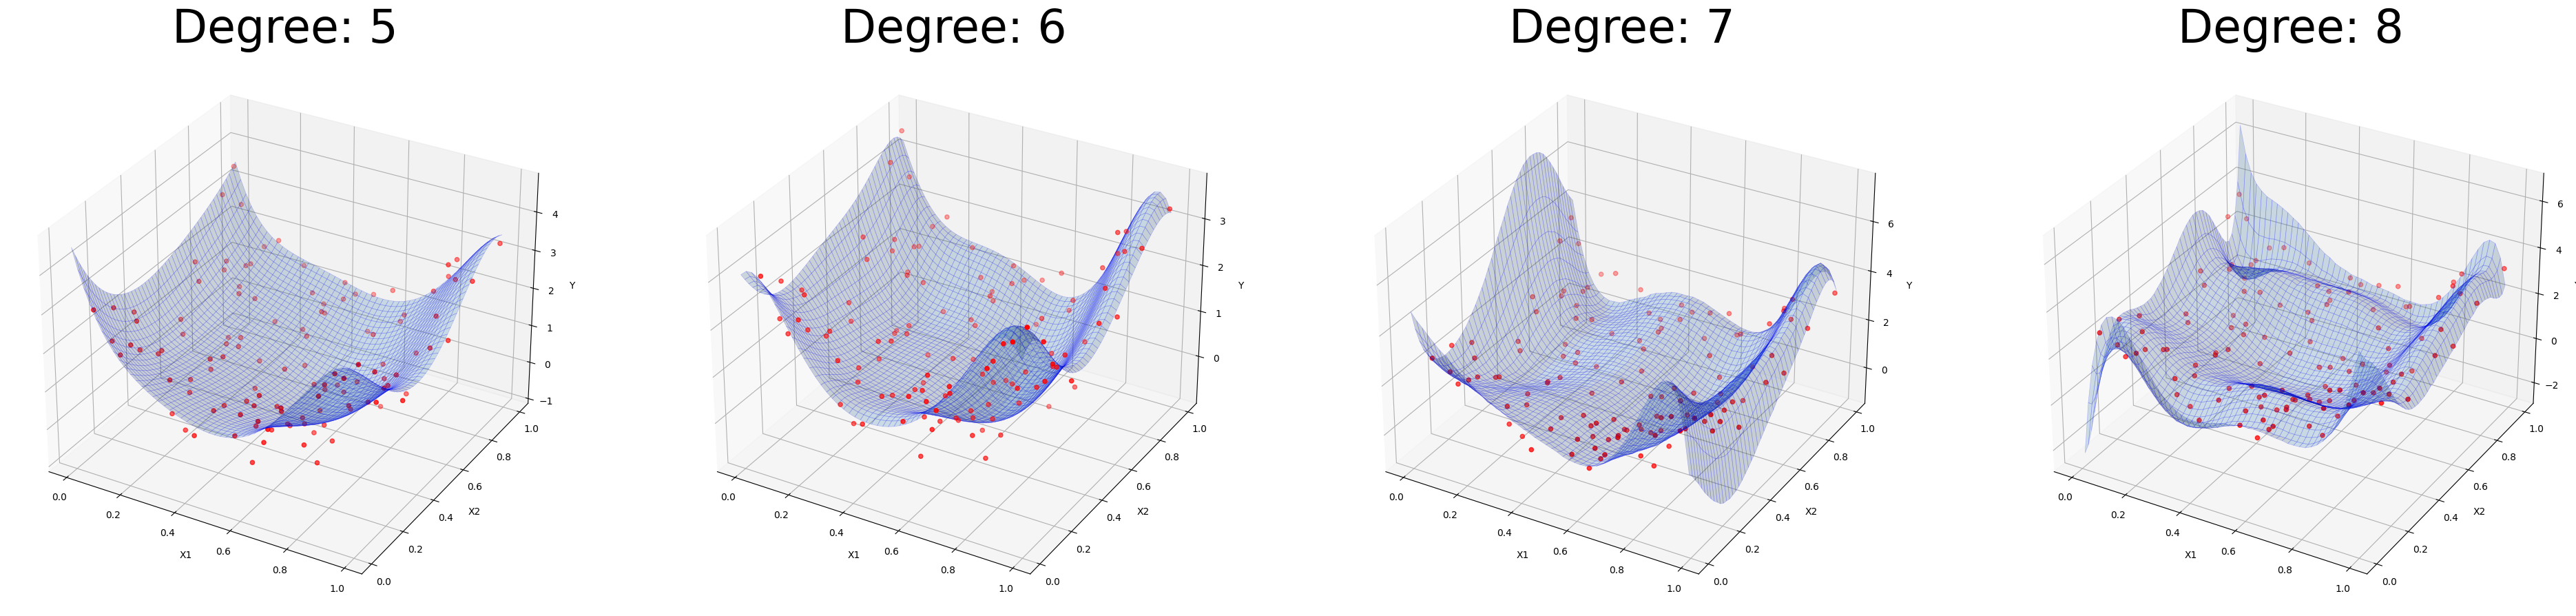

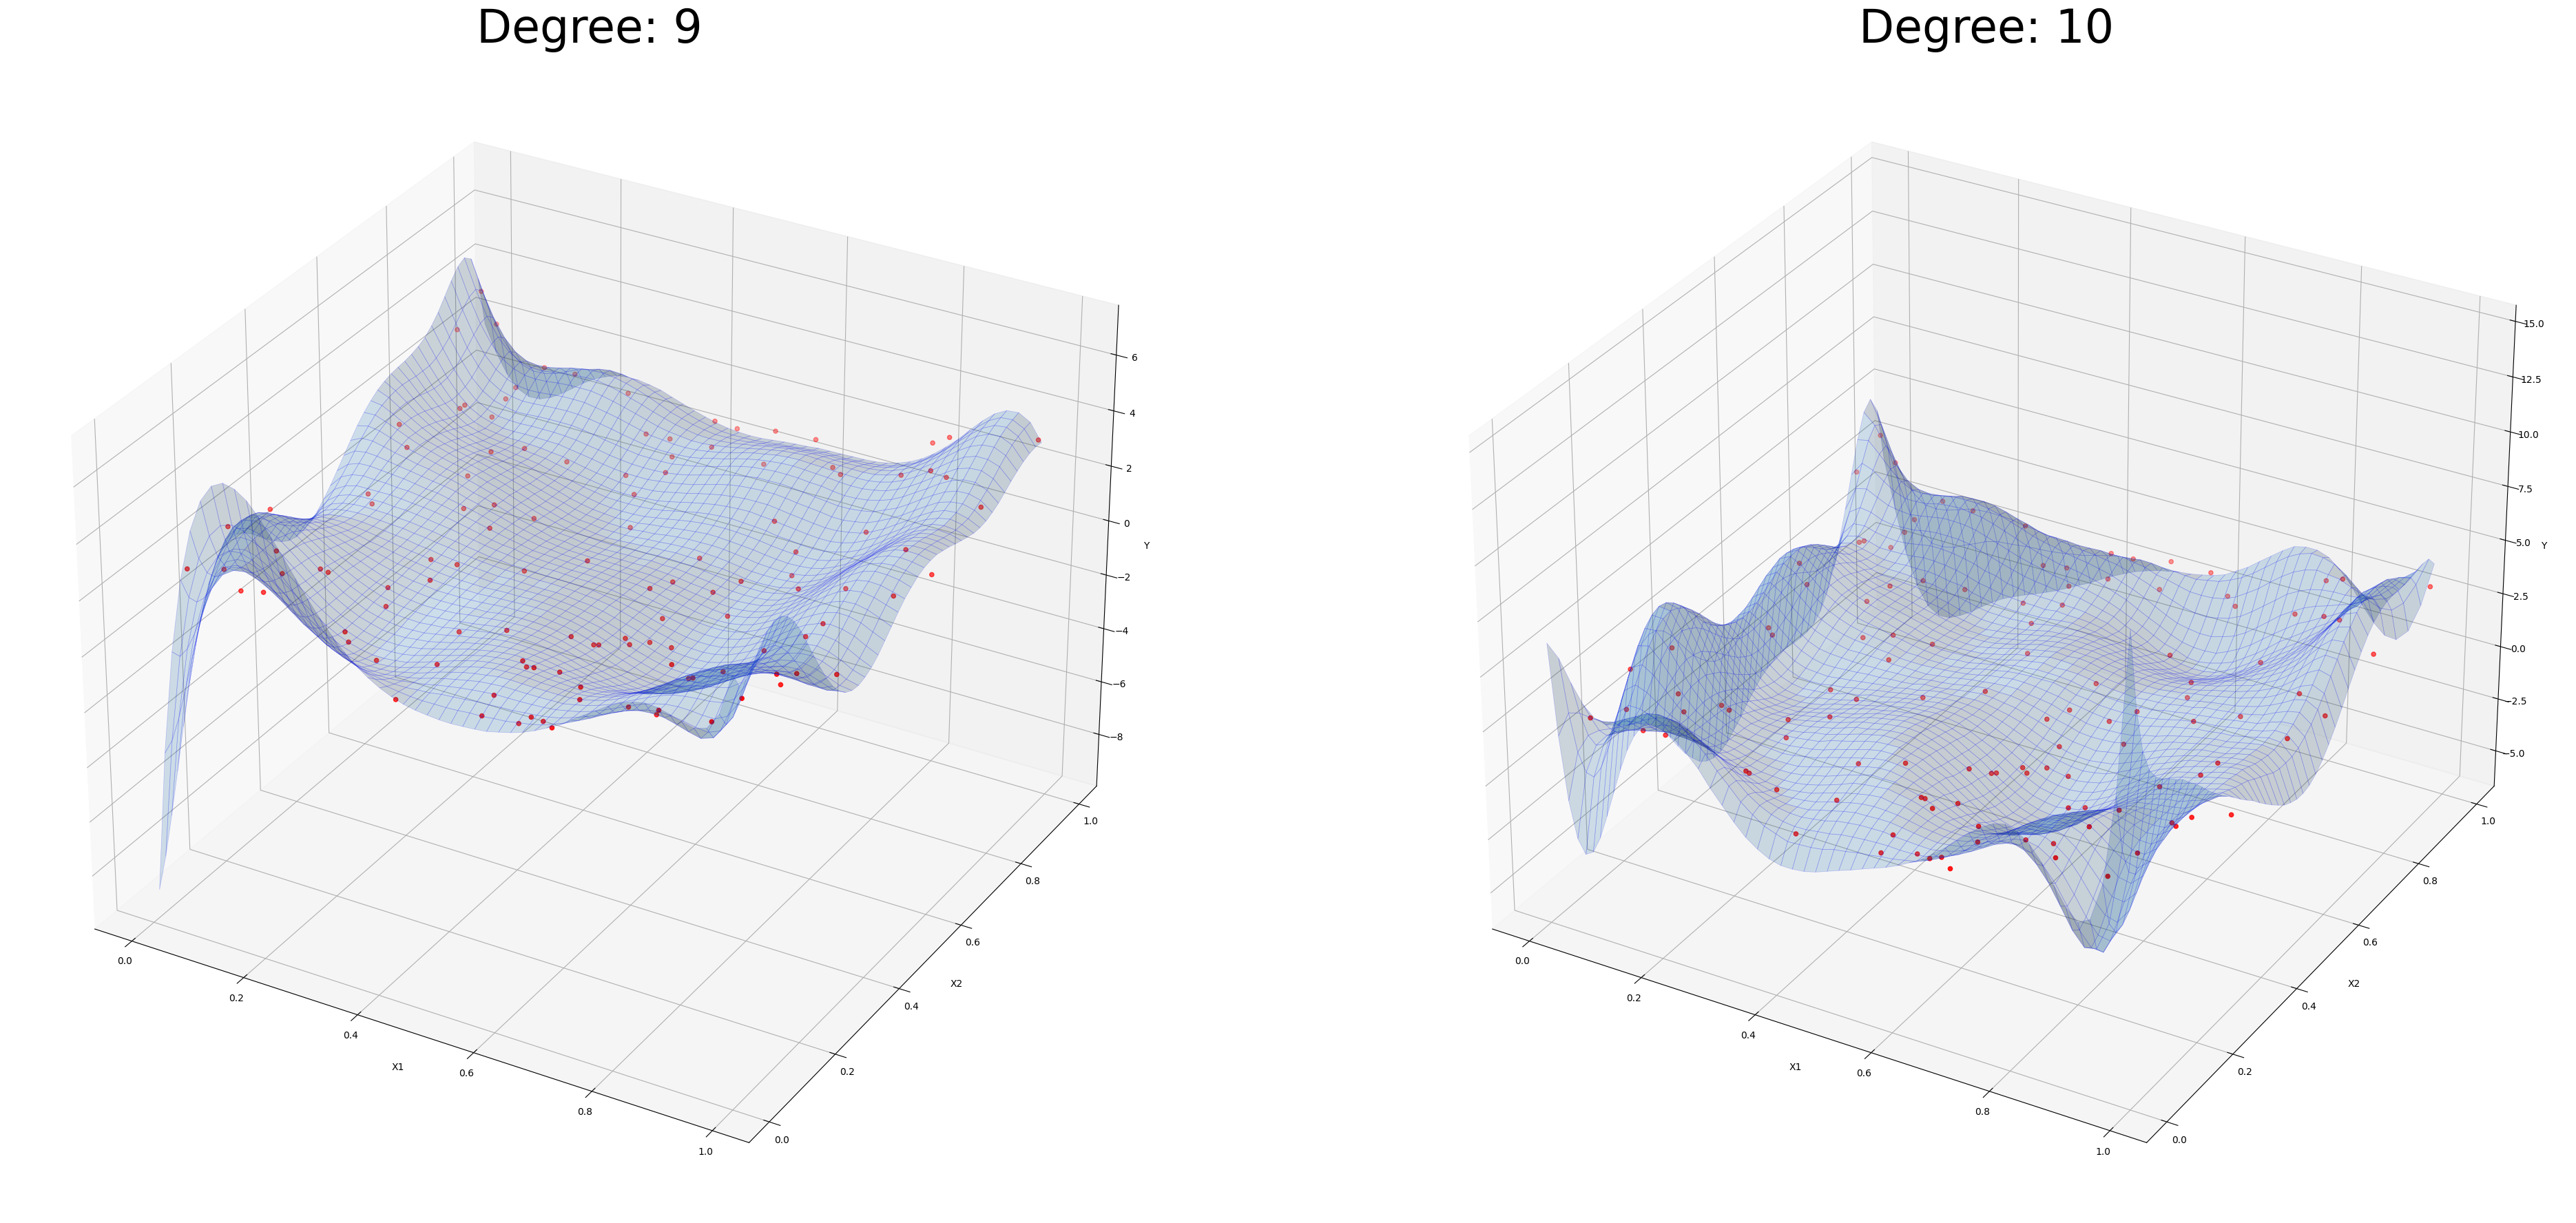

In [ ]:
draw_suerface(1, 5)
draw_suerface(5, 9)
draw_suerface(9, 11)
plt.show()

This part displays the plots in more convenient way, because you can move the axes and zoom in/out. So, you can see the surfaces in a more understandable and clear way.

In [ ]:
dataset = pd.read_csv("/content/Datasets/ML-Assignment2/data_reg.csv", sep=",")
X = dataset.drop(columns='y')
y = dataset['y']

X_train, X_val, X_test = X[:120], X[120:160], X[160:]
y_train, y_val, y_test = y[:120], y[120:160], y[160:]

mesh_size = .02
margin = 0
# Generate the plot
fig = px.scatter_3d(x=X_train['x1'], y=X_train['x2'], z=y_train)


fig = make_subplots(rows=5, cols=2,
                      specs=[[{'type': 'surface'}, {'type': 'surface'}],
                             [{'type': 'surface'}, {'type': 'surface'}],
                             [{'type': 'surface'}, {'type': 'surface'}],
                             [{'type': 'surface'}, {'type': 'surface'}],
                             [{'type': 'surface'}, {'type': 'surface'}]])
fig.update_traces(marker=dict(size=5))
row, col = 1, 1

for degree in range(1, 11):
  if degree-1 == 5:
    row = 1
    col = 2
  polynomial_features = PolynomialFeatures(degree=degree, include_bias=True)
  linearreg = LinearRegression()
  pipeline = make_pipeline(polynomial_features, linearreg)
  pipeline.fit(X_train, y_train)

  x_min, x_max = X_train.x1.min() - margin, X_train.x1.max() + margin
  y_min, y_max = X_train.x2.min() - margin, X_train.x2.max() + margin

  xrange = np.arange(x_min, x_max, mesh_size)
  yrange = np.arange(y_min, y_max, mesh_size)

  xx, yy = np.meshgrid(xrange, yrange)

  # Run model
  pred = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
  pred = pred.reshape(xx.shape)
  fig.add_trace(go.Scatter3d(x=X_train['x1'], y=X_train['x2'], z=y_train, mode='markers', marker = dict(size=5, color=y_train, opacity=.9)), row=row, col=col)
  fig.add_trace(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'), row=row, col=col)
  row = row + 1

fig.update_layout(title_text='3D subplots with different colorscales', title_x=0.5, height=1920, width=1080)
fig.show()

Plot the validation error vs polynomial degree curve.

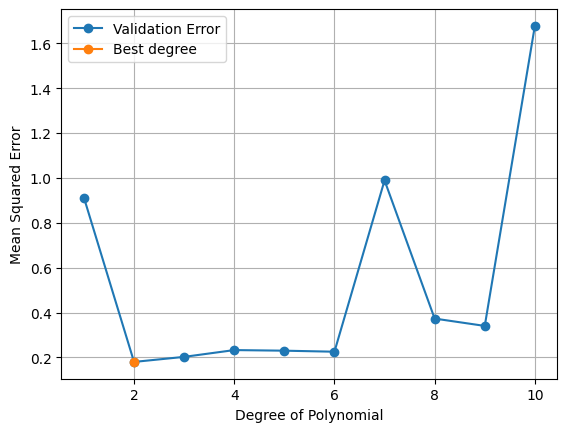

In [ ]:
training_error, validation_error, degrees = [],[],[]

dataset = pd.read_csv("/content/Datasets/ML-Assignment2/data_reg.csv", sep=",")

X = dataset.drop(columns='y')
y = dataset['y']

X_train, X_val, X_test = X[:120], X[120:160], X[160:]
y_train, y_val, y_test = y[:120], y[120:160], y[160:]

for degree in range(1, 11):
  polynomial_features = PolynomialFeatures(degree=degree)
  lr_model = LinearRegression()

  pipeline = make_pipeline(polynomial_features, lr_model)
  pipeline.fit(X_train, y_train)

  y_pred_val = pipeline.predict(X_val)
  validation_error.append(mean_squared_error(y_val, y_pred_val))
  degrees.append(degree)

fig, ax = plt.subplots()

ax.plot(degrees, validation_error, marker = 'o', label="Validation Error")

ax.plot(degrees[validation_error.index(min(validation_error))], min(validation_error), marker = 'o', label="Best degree")

ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
plt.grid(True)
plt.show();

The best degree is the one with least MSE, it is displayed in orange. The value of degree is **2**.

## Apply ridge regression

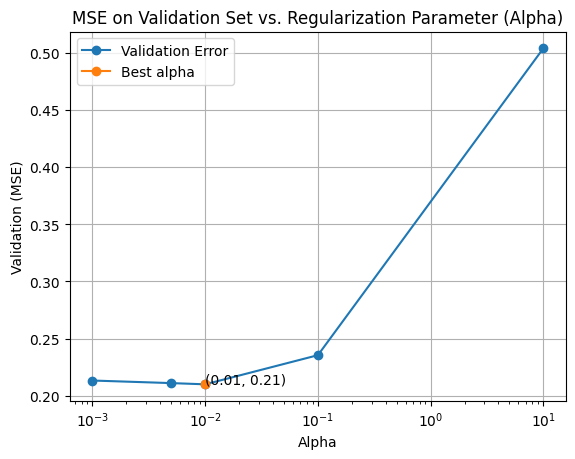

In [ ]:
dataset = pd.read_csv("/content/Datasets/ML-Assignment2/data_reg.csv", sep=",")

X = dataset.drop(columns='y')
y = dataset['y']

X_train, X_val, X_test = X[:120], X[120:160], X[160:]
y_train, y_val, y_test = y[:120], y[120:160], y[160:]

polynomial_features = PolynomialFeatures(degree=8)

alpha_vals = [0.001, 0.005, 0.01, 0.1, 10]
validation_mse = []

for alpha in alpha_vals:
  ridge = Ridge(alpha=alpha)
  pipeline = make_pipeline(polynomial_features, ridge)

  pipeline.fit(X_train, y_train)

  y_val_pred = pipeline.predict(X_val)

  validation_mse.append(
      mean_squared_error(y_val, y_val_pred)
  )

# Plot the errors as a function of increasing d value to visualise the training
# and testing errors
fig, ax = plt.subplots()

# Plot the training error with labels
ax.plot(alpha_vals, validation_mse, marker = 'o', label="Validation Error")

# Plot the validation error with labels
x, y = alpha_vals[validation_mse.index(min(validation_mse))], min(validation_mse)
ax.plot(x, y, marker = 'o', label="Best alpha")
plt.annotate('(%.2f, %.2f)' % (x, y), xy=(x, y))

# Set the plot labels and legends
ax.set_xlabel('Alpha')
ax.set_ylabel('Validation (MSE)')
ax.set_title('MSE on Validation Set vs. Regularization Parameter (Alpha)')
plt.grid(True)
ax.set_xscale('log')
ax.legend(loc = 'best')
plt.show();

The best alpha is the one with smallest MSE, the value is 0.01.

# **Logistic Regression**

The train_cls.csv file contains a set of training examples for a binary classification problem, and the testing examples are provided in the test_cls.csv file.

1. Using the logistic regression implementation of scikit-learn library, Learn a logistic regression model with a linear decision boundary. Draw the decision boundary of the learned model on a scatterplot of the training set (similar to Figure 1). Compute the training and testing accuracy of the learned model.

2. Repeat part 1 but now to learn a logistic regression model with quadratic decision boundary.

3. Comment on the learned models in 1 and 2 in terms of overfitting/underfitting.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

Plot the training and testing examples.

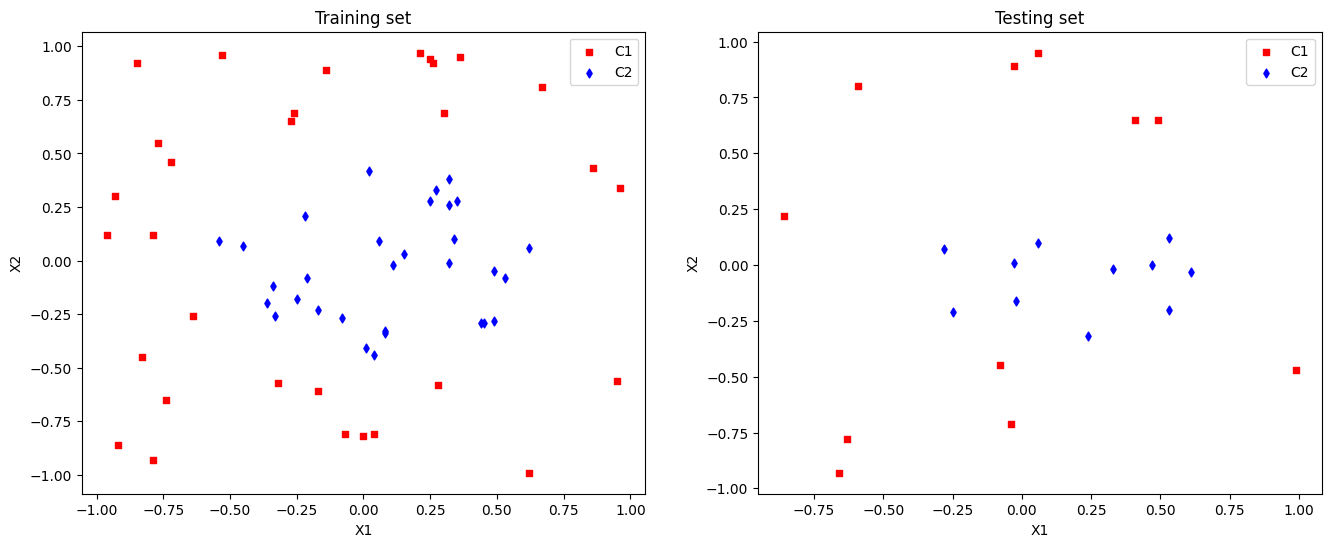

In [ ]:
# Load the training and testing data
train_data = pd.read_csv('/content/Datasets/ML-Assignment2/train_cls.csv')
test_data = pd.read_csv('/content/Datasets/ML-Assignment2/test_cls.csv')

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,6))

# Mapping classes to colors and markers
class_color = {'C1': ('r', 's'), 'C2': ('b', 'd')}

for class_label, (color, marker) in class_color.items():
    mask = (train_data['class'] == class_label)
    ax[0].scatter(train_data['x1'][mask], train_data['x2'][mask], c=color, s=20, marker=marker, label=class_label)
    mask = (test_data['class'] == class_label)
    ax[1].scatter(test_data['x1'][mask], test_data['x2'][mask], c=color, s=20, marker=marker, label=class_label)

ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].set_title('Training set')
ax[0].legend(loc="best")

ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')
ax[1].set_title('Testing set')
ax[1].legend(loc="best")

plt.show()

There are two classes (labels): C1, C2. The examples of C2 are in the center surrounded by the examples of C1. From the first sight, the data is not linearly separable.

## Learn a logistic regression model with a linear decision boundary


*   Draw the decision boundary of the learned model on a scatterplot of the training set.
*   Compute the training and testing accuracy of the learned model.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


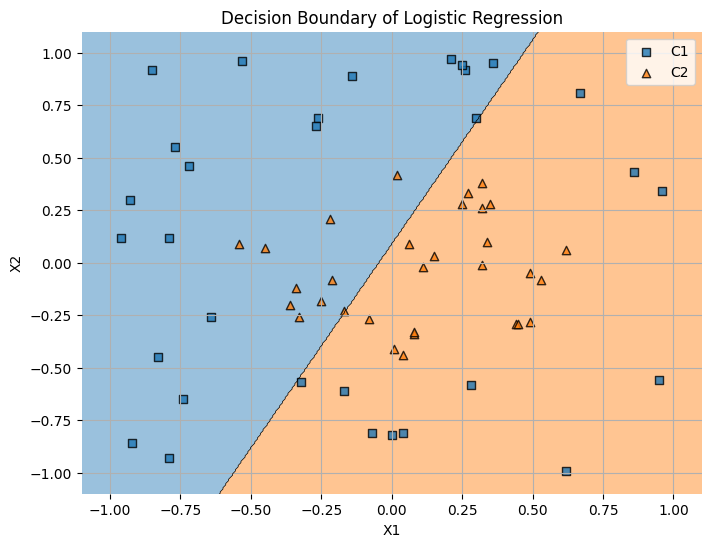

In [ ]:
# Load the training and testing data
train_data = pd.read_csv('/content/Datasets/ML-Assignment2/train_cls.csv')
test_data = pd.read_csv('/content/Datasets/ML-Assignment2/test_cls.csv')

label_encoder = LabelEncoder()

# Encoding train_data
train_data['class'] = label_encoder.fit_transform(train_data['class'])

# Encoding test_data
test_data['class'] = label_encoder.transform(test_data['class'])

# Split the training data into train and validation sets
X_train, y_train = train_data.drop('class', axis=1), train_data['class']
X_test, y_test= test_data.drop('class', axis=1), test_data['class']

# Create a logistic regression model with a linear decision boundary
lr_linear = LogisticRegression()

# Fit the model to the training data
lr_linear.fit(X_train, y_train)

plt.figure(figsize=(8,6))
plot_decision_regions(X_train.to_numpy(), y_train.to_numpy(), clf=lr_linear)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary of Logistic Regression')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['C1', 'C2'])
plt.grid(True)
plt.show()

We notice that the logistic regression model with a linear decision boundary splitted the data into two regions. However, the data is not splitted correctly since the relationship between both features are not linear which was shown above.

In [ ]:
# Make predictions on the training data
y_pred_train = lr_linear.predict(X_train)

# Compute the accuracy of the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)

# Make predictions on the testing data
y_pred_test = lr_linear.predict(X_test)

# Compute the accuracy of the model on the testing data
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracy of the model on the training data
print('Accuracy of linear logistic regression model on training set:', accuracy_train)

# Print the accuracy of the model on the testing data
print('Accuracy of linear logistic regression model on testing set:', accuracy_test)

Accuracy of linear logistic regression model on training set: 0.6612903225806451
Accuracy of linear logistic regression model on testing set: 0.6818181818181818


We got a low accuracy on both training and testing sets. This is due to the inability of splitting the data linearly using linear decision boundary.

## Learn a logistic regression model with quadratic decision boundary

First load the dataset (training and testing sets).

In [ ]:
# Load the training and testing data
train_data = pd.read_csv('/content/Datasets/ML-Assignment2/train_cls.csv')
test_data = pd.read_csv('/content/Datasets/ML-Assignment2/test_cls.csv')

Then, we encode the 'class' column into 0 or 1.

**Why?**

The function, *plot_decision_regions()*, I used for plotting the decision boundary doesn't accept string values, so I encoded it.

In [ ]:
label_encoder = LabelEncoder()

# Encoding train_data
train_data['class'] = label_encoder.fit_transform(train_data['class'])

# Encoding test_data
test_data['class'] = label_encoder.transform(test_data['class'])

Splitting the training and testing sets into X and y.

In [ ]:
# Split the training data into train and validation sets
X_train, y_train = train_data.drop('class', axis=1), train_data['class']
X_test, y_test= test_data.drop('class', axis=1), test_data['class']

Initialize the model and train it.

*   PolynomialFeatures parameters:

  * degree=2, because we want quadratic decision boundary.

  * include_bias=True: this includes the bias column (column of ones - acts as an intercept term in linear model).

  * interaction_only=False: this to include $X_1$, $X_2$, $X_1*X_2$, $X_1^2$, $X_2^2$.

*   LogisticRegression parameters:
  * random_state=0, means that we will get the same sequence of random numbers each time we run the code.

  * max_iter=500: maximum number of iterations taken for the solvers to converge.

  * C=100: inverse of regularization strength.



In [ ]:
# Create a logistic regression model with a quadratic decision boundary
poly_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
lr_model = LogisticRegression(random_state=0, max_iter=500, C=100)

lr_quadratic = make_pipeline(poly_features, lr_model)

# Fit the model to the training data
lr_quadratic.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression',
                 LogisticRegression(C=100, max_iter=500, random_state=0))])

The quadratic logistic regression.

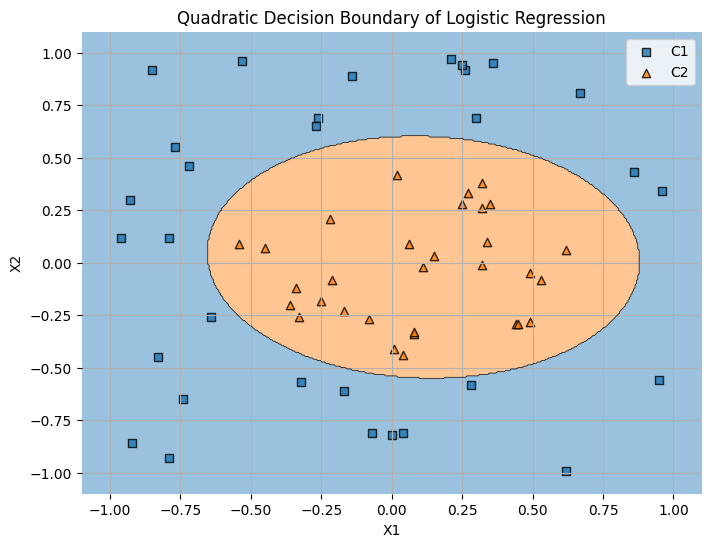

In [ ]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train.to_numpy(), y_train.to_numpy(), clf=lr_quadratic)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Quadratic Decision Boundary of Logistic Regression')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['C1', 'C2'])
plt.grid(True)
plt.show()

Finding the accuracies.

In [ ]:
# Make predictions on the training data
y_pred_train = lr_quadratic.predict(X_train)

# Compute the accuracy of the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)

# Make predictions on the testing data
y_pred_test = lr_quadratic.predict(X_test)

# Compute the accuracy of the model on the testing data
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracy of the model on the training data
print('Accuracy of linear logistic regression model on training set:', accuracy_train)

# Print the accuracy of the model on the testing data
print('Accuracy of linear logistic regression model on testing set:', accuracy_test)

Accuracy of linear logistic regression model on training set: 1.0
Accuracy of linear logistic regression model on testing set: 0.9545454545454546


## Comment on the learned models in terms of overfitting/underfitting.

Model 1 (Linear): The learned model according to the decision boundary plot seems to be underfitting. It is because the linear decision boundary of logistic regression is too rigid and fails to capture the nonlinear relationship between the features and the target, as indicated by how poorly it separates the two classes.

Model 2 (Quadratic): The learned model depicted in the decision boundary plot seems to be overfitting. It is because the quadratic decision boundary of logistic regression is too flexible and captures not only the underlying pattern but also the noise in the data, as indicated by how closely it fits to class C2 (triangles).

The linear logistic regression model is underfitting the data, as it is not able to capture the complex relationship between the features and the label. The quadratic logistic regression model is overfitting the data, as it is able to capture the complex relationship between the features and the label, but it is also learning the noise in the data.

# References

- https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

- https://plotly.com/python/ml-regression/

- https://harvard-iacs.github.io/2021-CS109A/lectures/lecture05/notebook-1/

- https://stackoverflow.com/questions/71795205/how-to-plot-the-decision-boundary-of-a-polynomial-logistic-regression-in-python

- http://inversionlabs.com/2016/03/21/best-fit-surfaces-for-3-dimensional-data.html